In [ ]:
%cd /content/drive/MyDrive/ProductRecomendation


[Errno 2] No such file or directory: '/content/drive/MyDrive/ProductRecomendation'
/content


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [33]:

!git config --global user.email "mirrahatfiverr@gmail.com"
!git config --global user.name "mirrahat"


In [34]:
!git add .
!git commit -m 'splitted'

[dev 635b63e] splitted
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite ProductRecomendation.ipynb (94%)


In [29]:
!ls

ProductRecomendation.ipynb  README.md


In [36]:

!git push {repo_url} dev --force


Enumerating objects: 13, done.
Counting objects: 100% (13/13), done.
Delta compression using up to 2 threads
Compressing objects: 100% (10/10), done.
Writing objects: 100% (11/11), 67.97 KiB | 1.89 MiB/s, done.
Total 11 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), done.
To https://github.com/mirrahat/ProductRecomendation.git
   b73cc75..635b63e  dev -> dev


In [ ]:
import os
os.chdir("/content/drive/MyDrive/ProductRecomendation")

In [31]:
!git commit -m "Remove secrets from notebook"
!git add ProductRecomendation.ipynb
!git commit -m "Cleaned notebook"


[dev a459b39] Remove secrets from notebook
 1 file changed, 1 deletion(-)
 delete mode 100644 ProductRecomendation.ipynb
[dev f13299b] Cleaned notebook
 1 file changed, 1 insertion(+)
 create mode 100644 ProductRecomendation.ipynb


In [3]:
import pandas as pd

file_path = '/content/drive/MyDrive/dataset/ratings_Electronics.csv'



# STEP 1: Load CSV without headers
df_raw = pd.read_csv(file_path, header=None)

# STEP 2: Show the first few rows so we can understand the structure
print("First 5 rows of raw data:")
print(df_raw.head())

# STEP 3: Assign proper column names
df_raw.columns = ['user_id', 'product_id', 'rating', 'timestamp']

# STEP 4: Drop timestamp (not needed)
df = df_raw.drop('timestamp', axis=1)

First 5 rows of raw data:
                0           1    2           3
0   AKM1MP6P0OYPR  0132793040  5.0  1365811200
1  A2CX7LUOHB2NDG  0321732944  5.0  1341100800
2  A2NWSAGRHCP8N5  0439886341  1.0  1367193600
3  A2WNBOD3WNDNKT  0439886341  3.0  1374451200
4  A1GI0U4ZRJA8WN  0439886341  1.0  1334707200


In [44]:
import pandas as pd

file_path = '/content/drive/MyDrive/dataset/ratings_Electronics.csv'



# STEP 1: Load CSV without headers
df_raw = pd.read_csv(file_path, header=None)

# STEP 2: Show the first few rows so we can understand the structure
print("First 5 rows of raw data:")
print(df_raw.head())

# STEP 3: Assign proper column names
df_raw.columns = ['user_id', 'product_id', 'rating', 'timestamp']

# STEP 4: Drop timestamp (not needed)
df = df_raw.drop('timestamp', axis=1)

# STEP 5: Verify it's working
print("\nFixed DataFrame:")
print(df.head())

# STEP 6: Basic info check
print("\nShape of dataset:", df.shape)
print("Unique users:", df['user_id'].nunique())
print("Unique products:", df['product_id'].nunique())

df = pd.read_csv(file_path, names=['userId', 'productId', 'rating', 'timestamp'])

# Optional: Convert scientific notation to string
df['productId'] = df['productId'].astype(str)
df['userId'] = df['userId'].astype(str)


First 5 rows of raw data:
                0           1    2           3
0   AKM1MP6P0OYPR  0132793040  5.0  1365811200
1  A2CX7LUOHB2NDG  0321732944  5.0  1341100800
2  A2NWSAGRHCP8N5  0439886341  1.0  1367193600
3  A2WNBOD3WNDNKT  0439886341  3.0  1374451200
4  A1GI0U4ZRJA8WN  0439886341  1.0  1334707200

Fixed DataFrame:
          user_id  product_id  rating
0   AKM1MP6P0OYPR  0132793040     5.0
1  A2CX7LUOHB2NDG  0321732944     5.0
2  A2NWSAGRHCP8N5  0439886341     1.0
3  A2WNBOD3WNDNKT  0439886341     3.0
4  A1GI0U4ZRJA8WN  0439886341     1.0

Shape of dataset: (7824482, 3)
Unique users: 4201696
Unique products: 476002


In [45]:
print(df.head())

           userId   productId  rating   timestamp
0   AKM1MP6P0OYPR  0132793040     5.0  1365811200
1  A2CX7LUOHB2NDG  0321732944     5.0  1341100800
2  A2NWSAGRHCP8N5  0439886341     1.0  1367193600
3  A2WNBOD3WNDNKT  0439886341     3.0  1374451200
4  A1GI0U4ZRJA8WN  0439886341     1.0  1334707200


In [47]:
df.drop('timestamp', axis=1, inplace=True)
df.head()  # confirm it's removed


,userId,productId,rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [6]:
# Dataset shape
print("Shape of the dataset:", df.shape)

# Unique users and products
print("Unique users:", df['userId'].nunique())
print("Unique products:", df['productId'].nunique())

# Basic statistics
df['rating'].describe()


Shape of the dataset: (7824482, 4)
Unique users: 4201696
Unique products: 476002


,rating
count,7.824482e+06
mean,4.012337e+00
std,1.380910e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


Shape of dataset: (7824482, 4)

Unique users: 4201696
Unique products: 476002


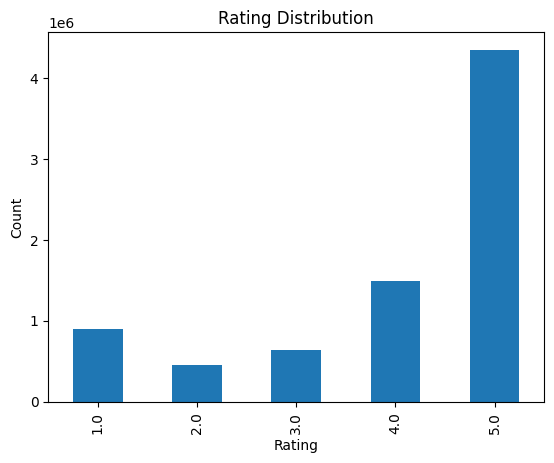

In [7]:
file_path = '/content/drive/MyDrive/dataset/ratings_Electronics.csv'

df = pd.read_csv(file_path, names=['user_id', 'product_id', 'rating', 'timestamp'])

print("Shape of dataset:", df.shape)
print("\nUnique users:", df['user_id'].nunique())
print("Unique products:", df['product_id'].nunique())

# Optional: rating distribution plot
import matplotlib.pyplot as plt
df['rating'].value_counts().sort_index().plot(kind='bar', title='Rating Distribution', xlabel='Rating', ylabel='Count')
plt.show()


In [82]:
df.drop_duplicates(subset=['user_id', 'product_id'], keep='last', inplace=True)


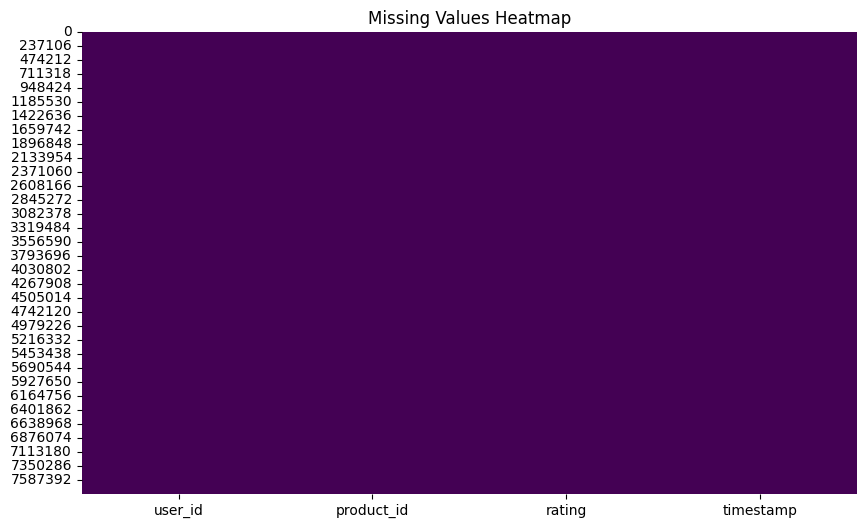

In [8]:
# Check missing values
df.isnull().sum()

# Optionally: visualize missing data
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [9]:
# Drop rows with any missing value
df.dropna(inplace=True)

# OR fill missing values (forward fill)
df.ffill(inplace=True)


In [37]:
X = df.drop(['rating'], axis=1)
y = df['rating']


In [38]:
from sklearn.preprocessing import LabelEncoder

user_encoder = LabelEncoder()
product_encoder = LabelEncoder()

X['user_id'] = user_encoder.fit_transform(X['user_id'])
X['product_id'] = product_encoder.fit_transform(X['product_id'])


In [39]:
import pandas as pd

X['timestamp'] = pd.to_datetime(X['timestamp'], unit='s')
X['year'] = X['timestamp'].dt.year
X['month'] = X['timestamp'].dt.month
X = X.drop('timestamp', axis=1)


In [48]:
df.head()


,userId,productId,rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [49]:
print("✅ Checking preprocessing status...\n")

# 1. Check for any missing values
print("Missing values:\n", df.isnull().sum())

# 2. Check columns present
print("\nCurrent columns in df:", df.columns.tolist())

# 3. Check if timestamp exists
if 'timestamp' in df.columns:
    print("❌ 'timestamp' column still exists. You may want to drop it.")
else:
    print("✅ 'timestamp' column is removed.")

# 4. Check data types
print("\nData types:\n", df.dtypes)

# 5. Check first few rows
print("\nSample data:\n", df.head())


✅ Checking preprocessing status...

Missing values:
 userId       0
productId    0
rating       0
dtype: int64

Current columns in df: ['userId', 'productId', 'rating']
✅ 'timestamp' column is removed.

Data types:
 userId        object
productId     object
rating       float64
dtype: object

Sample data:
            userId   productId  rating
0   AKM1MP6P0OYPR  0132793040     5.0
1  A2CX7LUOHB2NDG  0321732944     5.0
2  A2NWSAGRHCP8N5  0439886341     1.0
3  A2WNBOD3WNDNKT  0439886341     3.0
4  A1GI0U4ZRJA8WN  0439886341     1.0


In [50]:
from sklearn.preprocessing import LabelEncoder

user_encoder = LabelEncoder()
product_encoder = LabelEncoder()

df['userId'] = user_encoder.fit_transform(df['userId'])
df['productId'] = product_encoder.fit_transform(df['productId'])


In [51]:
df.dtypes


,0
userId,int64
productId,int64
rating,float64


In [4]:
# Check how many duplicate rows exist
duplicate_rows = df.duplicated()
print("Total duplicate rows:", duplicate_rows.sum())


Total duplicate rows: 0


In [6]:
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())


Shape of dataset: (7824482, 3)

Data types:
 user_id        object
product_id     object
rating        float64
dtype: object

Missing values:
 user_id       0
product_id    0
rating        0
dtype: int64


In [7]:
print("\nSummary statistics:\n", df.describe())



Summary statistics:
              rating
count  7.824482e+06
mean   4.012337e+00
std    1.380910e+00
min    1.000000e+00
25%    3.000000e+00
50%    5.000000e+00
75%    5.000000e+00
max    5.000000e+00


In [9]:
print("Number of unique users:", df['user_id'].nunique())
print("Number of unique products:", df['product_id'].nunique())


Number of unique users: 4201696
Number of unique products: 476002


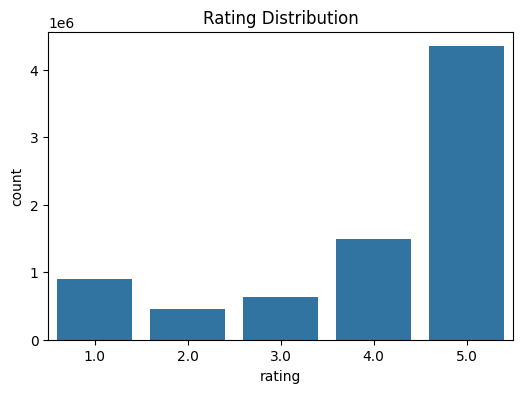

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='rating', data=df)
plt.title('Rating Distribution')
plt.show()


In [12]:
top_products = df.groupby('product_id')['rating'].mean().sort_values(ascending=False).head(10)
print("Top 10 highest-rated products:\n", top_products)


Top 10 highest-rated products:
 product_id
0132793040    5.0
B004SGH244    5.0
B004SQBRRM    5.0
B004SQC6O0    5.0
B004SQE6YI    5.0
B004SQFFCK    5.0
B004SQOR0G    5.0
B004SQVHU4    5.0
B004SQX8W4    5.0
B004SQYSUK    5.0
Name: rating, dtype: float64


In [13]:
# Filter only 5-star ratings
five_star_ratings = df[df['rating'] == 5.0]

# Count how many times each product received a 5-star rating
five_star_counts = five_star_ratings['product_id'].value_counts().head(10)

print("Top 10 products with most 5-star ratings:\n", five_star_counts)


Top 10 products with most 5-star ratings:
 product_id
B0074BW614    12765
B007WTAJTO    10674
B0019EHU8G    10637
B003ES5ZUU     8480
B00DR0PDNE     8281
B006GWO5WK     8111
B007R5YDYA     7862
B003ELYQGG     7754
B000LRMS66     7324
B0002L5R78     7146
Name: count, dtype: int64


In [15]:
# Create a basic product stats table
product_stats = (
    df.groupby('product_id')
      .agg(average_rating=('rating', 'mean'), total_ratings=('rating', 'count'))
)

# Count of 5-star ratings per product
five_star_counts = (
    df[df['rating'] == 5.0]
    .groupby('product_id')
    .size()
    .rename('five_star_count')
)

# Merge both into one DataFrame
product_stats = product_stats.merge(five_star_counts, on='product_id', how='left')
product_stats['five_star_count'] = product_stats['five_star_count'].fillna(0).astype(int)

# Show top 10 by five_star_count
top_five_star_products = product_stats.sort_values(by='five_star_count', ascending=False).head(10)

print("Top 10 products by number of 5-star ratings:\n", top_five_star_products)


Top 10 products by number of 5-star ratings:
             average_rating  total_ratings  five_star_count
product_id                                                
B0074BW614        4.491504          18244            12765
B007WTAJTO        4.424005          14172            10674
B0019EHU8G        4.754497          12285            10637
B003ES5ZUU        4.704749          10276             8480
B00DR0PDNE        3.931020          16454             8281
B006GWO5WK        4.314657          12226             8111
B007R5YDYA        4.690926           9907             7862
B003ELYQGG        4.392528          11617             7754
B000LRMS66        4.756627           8715             7324
B0002L5R78        4.448614           9487             7146
